In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, e, m_e, pi

In [94]:
R = 1.45e-2 # effective magnet radius [m]
B = .384 # magnetic field strength [T]

def T(phi):
    '''
    Arguments:
    ----------
    phi : [float]
        angle in degrees
        
    Returns:
    --------
    T : [float]
        kinnetic energy in eV
    '''
    phi = phi / 360 * 2 * pi # conversion to radians
    pc = e*B*R*c/np.tan(phi/2) # momentum
    T = np.sqrt((pc**2 + (m_e * c**2)**2)) - m_e*c**2 # kinetic energy
    
    return T / e # conversion to eV

T = np.vectorize(T, otypes = [float])

def tau(g_1, g_2, g_12):
    tau = (g_1 + g_2 - g_12)/ (2 * g_1 * g_2)
    return tau

In [97]:
def makePlot(x_label, y_label):
    fig, ax = plt.subplots(1,1, figsize = (10, 10))
    ax.set_xlabel = x_label
    ax.set_ylabel = y_label
    ax.grid()
    return fig, ax

Maximum number of counts: 354 at 100° (979965.502 eV).


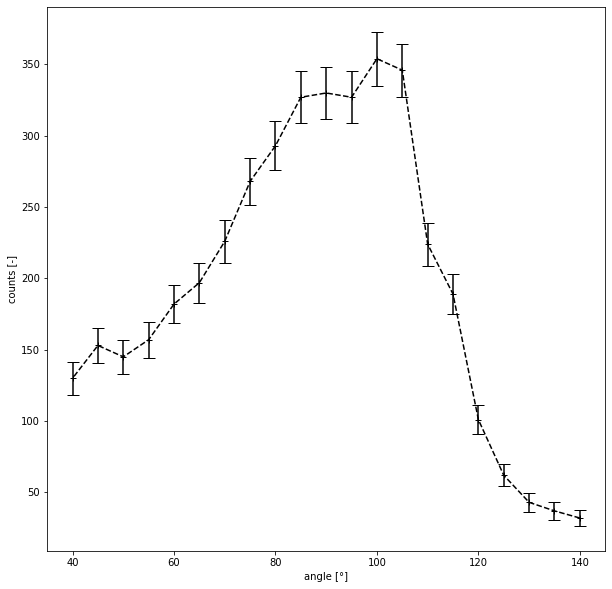

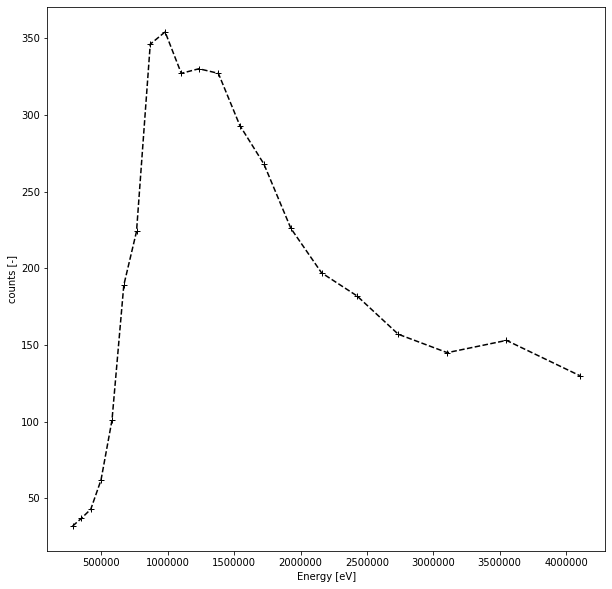

In [100]:
# U = 445 V, t = 200s
phi = [140, 135, 130, 125, 120, 115, 110, 105, 100,  95,  90,  85,  80,  75,  70,  65,  60,  55,  50,  45,  40]
n =   [ 32,  37,  43,  62, 101, 189, 224, 346, 354, 327, 330, 327, 293, 268, 226, 197, 182, 157, 145, 153, 130]
T_arr = T(phi)
err = np.sqrt(n)

print('Maximum number of counts: %i at %i° (%.3f eV).' % (max(n), phi[np.argmax(n)], T_arr[np.argmax(n)]))

fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.set_xlabel('angle [°]')
ax.set_ylabel('counts [-]')
ax.errorbar(phi, n, yerr = err, fmt= 'k+--', capsize = 6)

fig2, ax2 = plt.subplots(1,1,figsize = (10,10))
ax2.set_xlabel('Energy [eV]')
ax2.set_ylabel('counts [-]')
ax2.plot(T_arr, n, 'k+--')

In [108]:
t_g = 100 # measurement time [s]

# 3 trials, measurements [a,b,c]:
# a: source 1, blank
# b: source 1, source 2
# c: blank, source 2
# see notes for drawing

# counts:
G1 = [38067, 84189, 50140]
G2 = [39196, 80703, 51224]
G3 = [48277, 82322, 198]
G = np.array([G1, G2, G3]) #shape: (trial, measurement)

# rates:
g = G / t_g

taus = [tau(*g_i) for g_i in g]
for i, t in enumerate(taus):
    print('Measurement %i: tau = %.9fs' % (i+1, t))
print('Average:       tau = %.6fs' % (np.mean(taus)))

Measurement 1: tau = 0.001125117s
Measurement 2: tau = 0.001085519s
Measurement 3: tau = 0.270849080s
Average:       tau = 0.091020s


In [110]:
[1/ t for t in taus]

[888.7965674746242, 921.2187223880596, 3.692093023255814]